# WeatherPy

__*Importing Dependencies And Keys*__

In [81]:
# Dependencies
import json
import requests as req
import pandas as pd
import numpy as np
from config import gkey, wkey
from citipy import citipy
import time
import matplotlib.pyplot as plt


__*Creating Dataframe of Random Cities*__

In [82]:

# DF for randomly generated lat and long
location_data = pd.DataFrame()
location_data['rand_lat'] = [np.random.uniform(-90,90) for x in range(1500)]
location_data['rand_lng'] = [np.random.uniform(-180, 180) for x in range(1500)]

# add closest city and country column
location_data['nearest_city'] = ""
location_data['country'] = ""

#find and add closest city and country code
for index, row in location_data.iterrows():
    lat = row['rand_lat']
    lng = row['rand_lng']
    location_data.set_value(index, 'nearest_city', citipy.nearest_city(lat, lng).city_name)
    location_data.set_value(index, 'country', citipy.nearest_city(lat, lng).country_code)

/Users/vinnie/miniconda3/lib/python3.6/site-packages/ipykernel/__main__.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/vinnie/miniconda3/lib/python3.6/site-packages/ipykernel/__main__.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


__*Dataframe Top 5*__

In [83]:
location_data.head()

,rand_lat,rand_lng,nearest_city,country
0,-50.792324,-114.867152,rikitea,pf
1,-87.650503,149.833393,hobart,au
2,-36.735152,69.485699,mahebourg,mu
3,55.054657,167.522368,nikolskoye,ru
4,-77.677288,100.066271,albany,au


In [84]:
counter = 0
location_data["Humidity"] = ""
location_data["Wind Speed"] = ""
location_data["Temperature"] = ""
location_data["Cloudiness"] = ""
location_data["Exact Latitude"] = ""
location_data["Exact Longitude"] = ""

In [85]:
location_data.head()

,rand_lat,rand_lng,nearest_city,country,Humidity,Wind Speed,Temperature,Cloudiness,Exact Latitude,Exact Longitude
0,-50.792324,-114.867152,rikitea,pf,,,,,,
1,-87.650503,149.833393,hobart,au,,,,,,
2,-36.735152,69.485699,mahebourg,mu,,,,,,
3,55.054657,167.522368,nikolskoye,ru,,,,,,
4,-77.677288,100.066271,albany,au,,,,,,


In [ ]:
# Loop through and get the weather data using the Open Weather API.
print("Beginning Data Retrieval")
print("-----------------------------------")
for index, row in location_data.iterrows():
  #Open weather url.
    url = "https://api.openweathermap.org/data/2.5/weather?"
    #units = "Imperial"
    query_url = url + "lat=" + str(row["rand_lat"]) + "&lon=" + str(row["rand_lng"]) + "&appid=" + wkey
    
    print(f"Processing Record {counter} | {row['nearest_city']}")
    print(query_url)
    counter += 1
    weather = req.get(query_url).json()
    #print(weather)
    try:
        temperature = weather["main"]["temp"]
        humidity = weather["main"]["humidity"]
        cloudiness = weather["clouds"]["all"]
        wind_speed = weather["wind"]["speed"]
        new_lat = weather["coord"]["lat"]
        new_long = weather["coord"]["lon"]
        
        location_data.set_value(index, "Temperature", temperature)
        location_data.set_value(index,"Humidity", humidity)
        location_data.set_value(index,"Cloudiness", cloudiness)
        location_data.set_value(index,"Wind Speed", wind_speed)
        location_data.set_value(index, "Exact Latitude", new_lat)
        location_data.set_value(index, "Exact Longitude", new_long)
        
    except KeyError: 'main'
print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")


Beginning Data Retrieval
-----------------------------------
Processing Record 0 | rikitea
https://api.openweathermap.org/data/2.5/weather?lat=-50.7923241031634&lon=-114.86715206564016&appid=78534878b0dc2c8bfa945c96cb0bf322


/Users/vinnie/miniconda3/lib/python3.6/site-packages/ipykernel/__main__.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/vinnie/miniconda3/lib/python3.6/site-packages/ipykernel/__main__.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/vinnie/miniconda3/lib/python3.6/site-packages/ipykernel/__main__.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/vinnie/miniconda3/lib/python3.6/site-packages/ipykernel/__main__.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/vinnie/miniconda3/lib/python3.6/site-packages/ipykernel/__main__.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[

Processing Record 1 | hobart
https://api.openweathermap.org/data/2.5/weather?lat=-87.65050256140545&lon=149.83339329227226&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 2 | mahebourg
https://api.openweathermap.org/data/2.5/weather?lat=-36.735152054998906&lon=69.48569923656558&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 3 | nikolskoye
https://api.openweathermap.org/data/2.5/weather?lat=55.054657460402126&lon=167.52236792445075&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 4 | albany
https://api.openweathermap.org/data/2.5/weather?lat=-77.6772884251783&lon=100.06627062858337&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 5 | port alfred
https://api.openweathermap.org/data/2.5/weather?lat=-44.3173300559185&lon=30.250758826170227&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 6 | esperance
https://api.openweathermap.org/data/2.5/weather?lat=-49.86640433254365&lon=126.08957149005528&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Reco

Processing Record 51 | vaini
https://api.openweathermap.org/data/2.5/weather?lat=-28.335169540063788&lon=-179.47407215448155&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 52 | qasigiannguit
https://api.openweathermap.org/data/2.5/weather?lat=67.75052547426691&lon=-51.411030823504035&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 53 | east london
https://api.openweathermap.org/data/2.5/weather?lat=-40.5678041953564&lon=33.77522007905546&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 54 | nizhneyansk
https://api.openweathermap.org/data/2.5/weather?lat=81.63934091329034&lon=136.58269766946455&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 55 | antalaha
https://api.openweathermap.org/data/2.5/weather?lat=-15.150077020003252&lon=55.34256815751499&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 56 | kuloy
https://api.openweathermap.org/data/2.5/weather?lat=61.61106852103086&lon=42.55364676545227&appid=78534878b0dc2c8bfa945c96cb0bf322
Processi

Processing Record 101 | turtas
https://api.openweathermap.org/data/2.5/weather?lat=59.00272802875364&lon=69.76760422571124&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 102 | hay river
https://api.openweathermap.org/data/2.5/weather?lat=59.417740064327575&lon=-114.36371417571478&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 103 | cap malheureux
https://api.openweathermap.org/data/2.5/weather?lat=-14.705264227876228&lon=56.172486617486385&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 104 | lavrentiya
https://api.openweathermap.org/data/2.5/weather?lat=72.82502750173867&lon=-167.7565733228153&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 105 | bethel
https://api.openweathermap.org/data/2.5/weather?lat=44.42572194258591&lon=-171.64029797727378&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 106 | barentsburg
https://api.openweathermap.org/data/2.5/weather?lat=77.87264274656238&lon=4.259245425376093&appid=78534878b0dc2c8bfa945c96cb0bf322

Processing Record 151 | east london
https://api.openweathermap.org/data/2.5/weather?lat=-59.49446129218154&lon=49.66713100411519&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 152 | auki
https://api.openweathermap.org/data/2.5/weather?lat=-6.396099210017141&lon=163.17739419151093&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 153 | albany
https://api.openweathermap.org/data/2.5/weather?lat=-84.22863015870173&lon=102.59904711927692&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 154 | chunhuhub
https://api.openweathermap.org/data/2.5/weather?lat=19.097615085475326&lon=-88.72810930559692&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 155 | kodiak
https://api.openweathermap.org/data/2.5/weather?lat=42.31809222198751&lon=-146.178349711414&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 156 | new norfolk
https://api.openweathermap.org/data/2.5/weather?lat=-69.62907593094732&lon=137.03577013255756&appid=78534878b0dc2c8bfa945c96cb0bf322
Processi

Processing Record 201 | kijang
https://api.openweathermap.org/data/2.5/weather?lat=0.1458829436210891&lon=105.13641339084882&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 202 | castro
https://api.openweathermap.org/data/2.5/weather?lat=-47.97291726008501&lon=-92.39115101654319&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 203 | taolanaro
https://api.openweathermap.org/data/2.5/weather?lat=-46.90089047368726&lon=56.837768495491304&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 204 | puerto ayora
https://api.openweathermap.org/data/2.5/weather?lat=-18.75216235203608&lon=-97.95155614009222&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 205 | illoqqortoormiut
https://api.openweathermap.org/data/2.5/weather?lat=89.76967183726856&lon=-31.920111553811523&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 206 | illoqqortoormiut
https://api.openweathermap.org/data/2.5/weather?lat=76.82919733020884&lon=-26.46111284472525&appid=78534878b0dc2c8bfa945

Processing Record 251 | clyde river
https://api.openweathermap.org/data/2.5/weather?lat=72.03830296388446&lon=-74.87021047285063&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 252 | busselton
https://api.openweathermap.org/data/2.5/weather?lat=-35.20754678270181&lon=104.36947809508092&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 253 | toccoa
https://api.openweathermap.org/data/2.5/weather?lat=35.045842096745986&lon=-83.36659745859478&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 254 | fortuna
https://api.openweathermap.org/data/2.5/weather?lat=39.51075266250746&lon=-132.12445305127656&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 255 | isangel
https://api.openweathermap.org/data/2.5/weather?lat=-24.37494303046742&lon=176.72854655703316&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 256 | mendi
https://api.openweathermap.org/data/2.5/weather?lat=10.055768699670239&lon=34.94642640043827&appid=78534878b0dc2c8bfa945c96cb0bf322
Processin

Processing Record 301 | makubetsu
https://api.openweathermap.org/data/2.5/weather?lat=45.70150625149526&lon=142.28931203800812&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 302 | balabac
https://api.openweathermap.org/data/2.5/weather?lat=8.72185278040223&lon=115.38460830760573&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 303 | vaini
https://api.openweathermap.org/data/2.5/weather?lat=-44.2662480524403&lon=-174.6607516205772&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 304 | thompson
https://api.openweathermap.org/data/2.5/weather?lat=59.82182072692689&lon=-99.92856425754502&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 305 | aklavik
https://api.openweathermap.org/data/2.5/weather?lat=67.96126005737503&lon=-136.88860088727796&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 306 | luganville
https://api.openweathermap.org/data/2.5/weather?lat=-14.839157508399197&lon=165.45746304992036&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing

Processing Record 351 | pierre
https://api.openweathermap.org/data/2.5/weather?lat=45.12008422180094&lon=-101.37557969462524&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 352 | puerto ayora
https://api.openweathermap.org/data/2.5/weather?lat=-14.201583209684458&lon=-96.48600307986105&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 353 | busselton
https://api.openweathermap.org/data/2.5/weather?lat=-81.55303894046902&lon=90.9813343236795&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 354 | tairua
https://api.openweathermap.org/data/2.5/weather?lat=-36.76894053976332&lon=176.43945031959151&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 355 | otjimbingwe
https://api.openweathermap.org/data/2.5/weather?lat=-23.21321635039483&lon=16.18561830801761&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 356 | aklavik
https://api.openweathermap.org/data/2.5/weather?lat=67.96745692145629&lon=-137.50005394195858&appid=78534878b0dc2c8bfa945c96cb0bf322
Pro

Processing Record 401 | rikitea
https://api.openweathermap.org/data/2.5/weather?lat=-71.1586190021805&lon=-127.53043301048989&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 402 | rikitea
https://api.openweathermap.org/data/2.5/weather?lat=-59.04277048678614&lon=-118.35876607909282&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 403 | bambous virieux
https://api.openweathermap.org/data/2.5/weather?lat=-39.33135160363136&lon=83.20290995361182&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 404 | hobart
https://api.openweathermap.org/data/2.5/weather?lat=-52.338263276111945&lon=148.2916980444458&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 405 | atuona
https://api.openweathermap.org/data/2.5/weather?lat=7.349629929812053&lon=-127.54909893311037&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 406 | hilo
https://api.openweathermap.org/data/2.5/weather?lat=17.992494630180417&lon=-148.13654201587622&appid=78534878b0dc2c8bfa945c96cb0bf322
Proces

Processing Record 451 | vaini
https://api.openweathermap.org/data/2.5/weather?lat=-64.27245071691303&lon=-171.8537547828978&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 452 | ushuaia
https://api.openweathermap.org/data/2.5/weather?lat=-76.89801611902907&lon=-59.210709043226345&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 453 | rikitea
https://api.openweathermap.org/data/2.5/weather?lat=-83.93710653691855&lon=-128.89429156994538&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 454 | mar del plata
https://api.openweathermap.org/data/2.5/weather?lat=-46.21794973180554&lon=-50.27424236761607&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 455 | labuhan
https://api.openweathermap.org/data/2.5/weather?lat=-18.66886199488937&lon=95.17912965919044&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 456 | mataura
https://api.openweathermap.org/data/2.5/weather?lat=-49.57974192178441&lon=-144.53079942165084&appid=78534878b0dc2c8bfa945c96cb0bf322
Proc

Processing Record 501 | atuona
https://api.openweathermap.org/data/2.5/weather?lat=-9.17384852024557&lon=-121.65405918307678&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 502 | nanortalik
https://api.openweathermap.org/data/2.5/weather?lat=49.223606640207066&lon=-39.805029211061594&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 503 | kapaa
https://api.openweathermap.org/data/2.5/weather?lat=34.09537293003372&lon=-175.82128645117646&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 504 | barentsburg
https://api.openweathermap.org/data/2.5/weather?lat=88.1766351451302&lon=11.320561047623869&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 505 | bredasdorp
https://api.openweathermap.org/data/2.5/weather?lat=-86.62125540802074&lon=19.998199879361096&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 506 | husavik
https://api.openweathermap.org/data/2.5/weather?lat=75.7527098506101&lon=-9.683114723025483&appid=78534878b0dc2c8bfa945c96cb0bf322
Proces

Processing Record 551 | yellowknife
https://api.openweathermap.org/data/2.5/weather?lat=65.60295840563907&lon=-106.79113733611186&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 552 | louisbourg
https://api.openweathermap.org/data/2.5/weather?lat=44.6173298887137&lon=-57.910844017855496&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 553 | kodiak
https://api.openweathermap.org/data/2.5/weather?lat=44.0657376740491&lon=-160.53434561287668&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 554 | mankono
https://api.openweathermap.org/data/2.5/weather?lat=8.509135978597229&lon=-6.407244148822372&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 555 | punta arenas
https://api.openweathermap.org/data/2.5/weather?lat=-63.87399006458002&lon=-107.19387227486342&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 556 | manyana
https://api.openweathermap.org/data/2.5/weather?lat=-23.478945119283992&lon=20.50958156695441&appid=78534878b0dc2c8bfa945c96cb0bf322
P

Processing Record 601 | souillac
https://api.openweathermap.org/data/2.5/weather?lat=-57.54258803087754&lon=78.7127493081972&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 602 | khatanga
https://api.openweathermap.org/data/2.5/weather?lat=79.62659072288815&lon=106.82504766421982&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 603 | port alfred
https://api.openweathermap.org/data/2.5/weather?lat=-65.19796459130592&lon=41.31418069486011&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 604 | foumban
https://api.openweathermap.org/data/2.5/weather?lat=5.575011204775436&lon=11.626680177393183&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 605 | wernigerode
https://api.openweathermap.org/data/2.5/weather?lat=51.70419365525672&lon=10.801439749733134&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 606 | saryshagan
https://api.openweathermap.org/data/2.5/weather?lat=47.072749049626964&lon=73.00474861163437&appid=78534878b0dc2c8bfa945c96cb0bf322
Proc

Processing Record 651 | ushuaia
https://api.openweathermap.org/data/2.5/weather?lat=-72.81989193575913&lon=-29.08557152415142&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 652 | albany
https://api.openweathermap.org/data/2.5/weather?lat=-39.61933885999618&lon=118.73571404605502&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 653 | estelle
https://api.openweathermap.org/data/2.5/weather?lat=26.629473290444864&lon=-88.45216562661379&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 654 | hasaki
https://api.openweathermap.org/data/2.5/weather?lat=28.634591871806677&lon=153.3028164756102&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 655 | jalu
https://api.openweathermap.org/data/2.5/weather?lat=26.13494476045777&lon=20.870282736123414&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 656 | tuktoyaktuk
https://api.openweathermap.org/data/2.5/weather?lat=74.85446583412468&lon=-130.18046639608502&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Re

Processing Record 701 | guaruja
https://api.openweathermap.org/data/2.5/weather?lat=-26.15039176287265&lon=-45.434300828566734&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 702 | zhanakorgan
https://api.openweathermap.org/data/2.5/weather?lat=45.24844862554707&lon=67.91428622944014&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 703 | sayyan
https://api.openweathermap.org/data/2.5/weather?lat=16.241148264132633&lon=44.315031944376614&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 704 | sumenep
https://api.openweathermap.org/data/2.5/weather?lat=-6.249300339906341&lon=114.26175866717892&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 705 | bredasdorp
https://api.openweathermap.org/data/2.5/weather?lat=-82.72717407570158&lon=25.216278335305617&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 706 | koscian
https://api.openweathermap.org/data/2.5/weather?lat=51.965685694282996&lon=16.776039703279224&appid=78534878b0dc2c8bfa945c96cb0bf322
Proce

Processing Record 751 | rikitea
https://api.openweathermap.org/data/2.5/weather?lat=-36.60554836473162&lon=-122.63209958055683&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 752 | ushuaia
https://api.openweathermap.org/data/2.5/weather?lat=-78.72435965041717&lon=-36.647746023839375&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 753 | puerto ayora
https://api.openweathermap.org/data/2.5/weather?lat=3.7900819921055984&lon=-95.73267584055438&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 754 | hamilton
https://api.openweathermap.org/data/2.5/weather?lat=32.08365348067804&lon=-69.55007269531505&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 755 | mar del plata
https://api.openweathermap.org/data/2.5/weather?lat=-70.7404810233228&lon=-20.79837873613107&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 756 | hilo
https://api.openweathermap.org/data/2.5/weather?lat=8.588810338586924&lon=-151.17558870671306&appid=78534878b0dc2c8bfa945c96cb0bf322
P

Processing Record 801 | ushuaia
https://api.openweathermap.org/data/2.5/weather?lat=-79.5227780996902&lon=-19.021081325139534&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 802 | busselton
https://api.openweathermap.org/data/2.5/weather?lat=-77.65327459284501&lon=86.4726319139807&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 803 | rikitea
https://api.openweathermap.org/data/2.5/weather?lat=-76.62597644363747&lon=-128.73605371664365&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 804 | mataura
https://api.openweathermap.org/data/2.5/weather?lat=-58.42343095265963&lon=-157.58712725864976&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 805 | saldanha
https://api.openweathermap.org/data/2.5/weather?lat=-34.59286996937662&lon=15.912586060708321&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 806 | hobart
https://api.openweathermap.org/data/2.5/weather?lat=-68.96199742824466&lon=146.80856641258163&appid=78534878b0dc2c8bfa945c96cb0bf322
Processi

Processing Record 851 | bournemouth
https://api.openweathermap.org/data/2.5/weather?lat=50.52993420966715&lon=-1.905592553898117&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 852 | chokurdakh
https://api.openweathermap.org/data/2.5/weather?lat=79.02779217362504&lon=150.18853188526072&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 853 | port elizabeth
https://api.openweathermap.org/data/2.5/weather?lat=-68.85280274314817&lon=34.093887324373384&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 854 | atuona
https://api.openweathermap.org/data/2.5/weather?lat=-11.628696583412449&lon=-129.25925294614774&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 855 | hamilton
https://api.openweathermap.org/data/2.5/weather?lat=32.31938489617305&lon=-66.42299569193628&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 856 | hilo
https://api.openweathermap.org/data/2.5/weather?lat=3.8883558909515017&lon=-160.92663056241008&appid=78534878b0dc2c8bfa945c96cb0bf322

Processing Record 901 | saint-philippe
https://api.openweathermap.org/data/2.5/weather?lat=-29.805024225710433&lon=57.51082622922729&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 902 | puerto ayora
https://api.openweathermap.org/data/2.5/weather?lat=-17.03591513199126&lon=-102.37248845175355&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 903 | visby
https://api.openweathermap.org/data/2.5/weather?lat=57.969322492119886&lon=18.09784977990134&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 904 | rikitea
https://api.openweathermap.org/data/2.5/weather?lat=-88.27850188698308&lon=-131.7195536624308&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 905 | rikitea
https://api.openweathermap.org/data/2.5/weather?lat=-31.97739655358241&lon=-105.48268774391329&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 906 | haibowan
https://api.openweathermap.org/data/2.5/weather?lat=41.93652114300329&lon=105.00430371305549&appid=78534878b0dc2c8bfa945c96cb0bf322

Processing Record 951 | sataua
https://api.openweathermap.org/data/2.5/weather?lat=-8.183965169383242&lon=-173.8344202317159&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 952 | namibe
https://api.openweathermap.org/data/2.5/weather?lat=-18.633300833283684&lon=8.437592782622943&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 953 | nikolskoye
https://api.openweathermap.org/data/2.5/weather?lat=47.11341537964617&lon=166.86311263019314&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 954 | tateyama
https://api.openweathermap.org/data/2.5/weather?lat=32.334049405160584&lon=140.7311715744729&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 955 | kushima
https://api.openweathermap.org/data/2.5/weather?lat=30.462045945049482&lon=131.99629236218186&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 956 | saint-georges
https://api.openweathermap.org/data/2.5/weather?lat=5.763748787687277&lon=-46.700627585470926&appid=78534878b0dc2c8bfa945c96cb0bf322
Proc

Processing Record 1001 | palabuhanratu
https://api.openweathermap.org/data/2.5/weather?lat=-21.02301907591017&lon=96.34595185570612&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 1002 | mataura
https://api.openweathermap.org/data/2.5/weather?lat=-73.45372320434691&lon=-154.028878797863&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 1003 | coracora
https://api.openweathermap.org/data/2.5/weather?lat=-15.408827813704221&lon=-73.34300564989299&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 1004 | capinopolis
https://api.openweathermap.org/data/2.5/weather?lat=-18.34548013758794&lon=-49.64311307688095&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 1005 | ushuaia
https://api.openweathermap.org/data/2.5/weather?lat=-57.55985069140684&lon=-70.5215972292973&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 1006 | broken hill
https://api.openweathermap.org/data/2.5/weather?lat=-26.928729744829894&lon=140.26746073149695&appid=78534878b0dc2c8bfa945c9

Processing Record 1051 | saint-philippe
https://api.openweathermap.org/data/2.5/weather?lat=-69.30862305366176&lon=71.07194210591382&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 1052 | hobart
https://api.openweathermap.org/data/2.5/weather?lat=-56.98365843927325&lon=147.23647715218755&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 1053 | victoria
https://api.openweathermap.org/data/2.5/weather?lat=-7.701275266531553&lon=65.20938757983268&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 1054 | qaanaaq
https://api.openweathermap.org/data/2.5/weather?lat=74.15566034701902&lon=-71.23253990635892&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 1055 | denpasar
https://api.openweathermap.org/data/2.5/weather?lat=-13.745649002152604&lon=115.14291315601662&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 1056 | nacogdoches
https://api.openweathermap.org/data/2.5/weather?lat=31.327153676610237&lon=-94.04527915375179&appid=78534878b0dc2c8bfa945c96cb0

Processing Record 1101 | nome
https://api.openweathermap.org/data/2.5/weather?lat=70.44780592253301&lon=-164.21196865026153&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 1102 | alofi
https://api.openweathermap.org/data/2.5/weather?lat=-17.043391675766486&lon=-164.61893298988625&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 1103 | rikitea
https://api.openweathermap.org/data/2.5/weather?lat=-39.7938936202734&lon=-132.3443219846209&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 1104 | saint george
https://api.openweathermap.org/data/2.5/weather?lat=31.952503010940134&lon=-63.883395203240454&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 1105 | asau
https://api.openweathermap.org/data/2.5/weather?lat=-11.09546173427897&lon=176.86413950091588&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 1106 | narsaq
https://api.openweathermap.org/data/2.5/weather?lat=88.02422205699233&lon=-59.75440075987042&appid=78534878b0dc2c8bfa945c96cb0bf322
Process

Processing Record 1150 | avarua
https://api.openweathermap.org/data/2.5/weather?lat=-29.319497547326087&lon=-157.82614189626335&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 1151 | belushya guba
https://api.openweathermap.org/data/2.5/weather?lat=82.07912267900548&lon=54.68738935898725&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 1152 | chuy
https://api.openweathermap.org/data/2.5/weather?lat=-41.34506520259828&lon=-42.89839014987399&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 1153 | leningradskiy
https://api.openweathermap.org/data/2.5/weather?lat=70.93773453949831&lon=176.11248795874724&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 1154 | atuona
https://api.openweathermap.org/data/2.5/weather?lat=-11.263666099338877&lon=-130.52095804504765&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 1155 | ban nahin
https://api.openweathermap.org/data/2.5/weather?lat=18.735625035426196&lon=104.38801922552085&appid=78534878b0dc2c8bfa945c96cb0

Processing Record 1199 | dzhusaly
https://api.openweathermap.org/data/2.5/weather?lat=44.870735677593785&lon=63.834295898574936&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 1200 | marcona
https://api.openweathermap.org/data/2.5/weather?lat=-18.10566977080346&lon=-79.02237473032288&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 1201 | guangyuan
https://api.openweathermap.org/data/2.5/weather?lat=33.53573433982396&lon=104.4015761246635&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 1202 | bacuit
https://api.openweathermap.org/data/2.5/weather?lat=12.809680056647778&lon=115.37333804154576&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 1203 | nanortalik
https://api.openweathermap.org/data/2.5/weather?lat=49.46284972773603&lon=-40.63736277012134&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 1204 | kaseda
https://api.openweathermap.org/data/2.5/weather?lat=31.05316253627757&lon=130.15677714020325&appid=78534878b0dc2c8bfa945c96cb0bf322
Proc

Processing Record 1249 | punta arenas
https://api.openweathermap.org/data/2.5/weather?lat=-58.00639525139593&lon=-106.00738524547658&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 1250 | athabasca
https://api.openweathermap.org/data/2.5/weather?lat=57.79911039136877&lon=-112.16486512382798&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 1251 | isabela
https://api.openweathermap.org/data/2.5/weather?lat=20.3037631103753&lon=-67.52391036296581&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 1252 | ugoofaaru
https://api.openweathermap.org/data/2.5/weather?lat=5.03654547990169&lon=63.07427556998306&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 1253 | nanortalik
https://api.openweathermap.org/data/2.5/weather?lat=52.87650711463601&lon=-34.313930719352754&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 1254 | tiksi
https://api.openweathermap.org/data/2.5/weather?lat=78.12289074654959&lon=130.66318765778334&appid=78534878b0dc2c8bfa945c96cb0bf322

Processing Record 1299 | tual
https://api.openweathermap.org/data/2.5/weather?lat=-8.052191510685688&lon=131.22492997277408&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 1300 | santa lucia
https://api.openweathermap.org/data/2.5/weather?lat=24.563973895878874&lon=-15.87565893267822&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 1301 | pyapon
https://api.openweathermap.org/data/2.5/weather?lat=15.699961471321288&lon=95.74752862668993&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 1302 | puerto ayora
https://api.openweathermap.org/data/2.5/weather?lat=-6.65397086121834&lon=-98.00934327472568&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 1303 | bethel
https://api.openweathermap.org/data/2.5/weather?lat=59.26136113435024&lon=-163.51032156220882&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 1304 | rikitea
https://api.openweathermap.org/data/2.5/weather?lat=-30.92095919265379&lon=-117.90380228160183&appid=78534878b0dc2c8bfa945c96cb0bf322
P

Processing Record 1348 | quang ngai
https://api.openweathermap.org/data/2.5/weather?lat=15.822217713531145&lon=109.49135324091833&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 1349 | bredasdorp
https://api.openweathermap.org/data/2.5/weather?lat=-85.4211144319307&lon=18.180067736132344&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 1350 | port alfred
https://api.openweathermap.org/data/2.5/weather?lat=-79.18936363247175&lon=50.60076393339591&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 1351 | quelimane
https://api.openweathermap.org/data/2.5/weather?lat=-17.36541625987124&lon=36.90182043526977&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 1352 | mataura
https://api.openweathermap.org/data/2.5/weather?lat=-46.03682194554082&lon=-153.3127536930565&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 1353 | hermanus
https://api.openweathermap.org/data/2.5/weather?lat=-84.09619019008014&lon=-1.071452043399887&appid=78534878b0dc2c8bfa945c96cb0

Processing Record 1398 | kaspiyskiy
https://api.openweathermap.org/data/2.5/weather?lat=45.310545010897016&lon=47.82475235006089&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 1399 | puerto ayora
https://api.openweathermap.org/data/2.5/weather?lat=-7.007486138588007&lon=-112.9455890640067&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 1400 | barrow
https://api.openweathermap.org/data/2.5/weather?lat=80.64914026614994&lon=-152.18222259510765&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 1401 | arraial do cabo
https://api.openweathermap.org/data/2.5/weather?lat=-34.32164129128296&lon=-25.990852046654624&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 1402 | rikitea
https://api.openweathermap.org/data/2.5/weather?lat=-59.07388951016779&lon=-119.3915196815718&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 1403 | nangomba
https://api.openweathermap.org/data/2.5/weather?lat=-10.706429826707279&lon=38.50153928942615&appid=78534878b0dc2c8bfa945

Processing Record 1448 | mendahara
https://api.openweathermap.org/data/2.5/weather?lat=-0.1776732221923396&lon=102.87653630098009&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 1449 | ushuaia
https://api.openweathermap.org/data/2.5/weather?lat=-72.57741025461803&lon=-45.18339865176475&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 1450 | nahrin
https://api.openweathermap.org/data/2.5/weather?lat=36.117918336326966&lon=69.12501037143201&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 1451 | punta arenas
https://api.openweathermap.org/data/2.5/weather?lat=-73.69825422688675&lon=-95.50183966177006&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 1452 | tasiilaq
https://api.openweathermap.org/data/2.5/weather?lat=71.89282295399053&lon=-41.398879254757134&appid=78534878b0dc2c8bfa945c96cb0bf322
Processing Record 1453 | punta arenas
https://api.openweathermap.org/data/2.5/weather?lat=-86.89172831980834&lon=-119.25081232918265&appid=78534878b0dc2c8bfa945c96

In [54]:
location_data.head()

,rand_lat,rand_lng,nearest_city,country,Humidity,Wind Speed,Temperature,Cloudiness,Exact Latitude,Exact Longitude
0,33.835532,-82.449824,evans,us,65,3.6,301.35,1,33.84,-82.45
1,-4.563154,-76.170970,barranca,pe,78,1.46,300.385,24,-4.56,-76.17
2,83.588271,-177.619930,mys shmidta,ru,99,2.51,272.435,80,83.59,-177.62
3,4.752159,142.525207,vanimo,pg,100,1.86,302.685,88,4.75,142.53
4,-61.001173,97.572200,busselton,au,100,11.16,267.985,68,-61,97.57


In [55]:
location_data.drop_duplicates(subset=["nearest_city","country"], inplace=True)
len(location_data)

656

In [56]:
location_data["Temperature (F)"] = ""

try:
    for index,row in location_data.iterrows():
        tf = round((location_data.iloc[index, 6] * 1.8) - 459.67,2)
        location_data.set_value(index, "Temperature (F)", tf)
except: 
    print("Converstion Complete!")
location_data.head()

Converstion Complete!


/Users/vinnie/miniconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,rand_lat,rand_lng,nearest_city,country,Humidity,Wind Speed,Temperature,Cloudiness,Exact Latitude,Exact Longitude,Temperature (F)
0,33.835532,-82.449824,evans,us,65,3.6,301.35,1,33.84,-82.45,82.76
1,-4.563154,-76.170970,barranca,pe,78,1.46,300.385,24,-4.56,-76.17,81.02
2,83.588271,-177.619930,mys shmidta,ru,99,2.51,272.435,80,83.59,-177.62,30.71
3,4.752159,142.525207,vanimo,pg,100,1.86,302.685,88,4.75,142.53,85.16
4,-61.001173,97.572200,busselton,au,100,11.16,267.985,68,-61,97.57,22.7


In [57]:


location_data = location_data.drop('Temperature', 1)
location_data = location_data.drop('rand_lat', 1)
location_data = location_data.drop('rand_lng', 1)
location_data.head()

,nearest_city,country,Humidity,Wind Speed,Cloudiness,Exact Latitude,Exact Longitude,Temperature (F)
0,evans,us,65,3.6,1,33.84,-82.45,82.76
1,barranca,pe,78,1.46,24,-4.56,-76.17,81.02
2,mys shmidta,ru,99,2.51,80,83.59,-177.62,30.71
3,vanimo,pg,100,1.86,88,4.75,142.53,85.16
4,busselton,au,100,11.16,68,-61,97.57,22.7


In [58]:
location_data = location_data.rename(columns = {'nearest_city': 'City',
                                                 'Exact Latitude': 'Latitude',
                                                 'Exact Longitude': 'Longitude',
                                                 'country': 'Country'})
location_data.head()

,City,Country,Humidity,Wind Speed,Cloudiness,Latitude,Longitude,Temperature (F)
0,evans,us,65,3.6,1,33.84,-82.45,82.76
1,barranca,pe,78,1.46,24,-4.56,-76.17,81.02
2,mys shmidta,ru,99,2.51,80,83.59,-177.62,30.71
3,vanimo,pg,100,1.86,88,4.75,142.53,85.16
4,busselton,au,100,11.16,68,-61,97.57,22.7


# Temperature vs Latitude

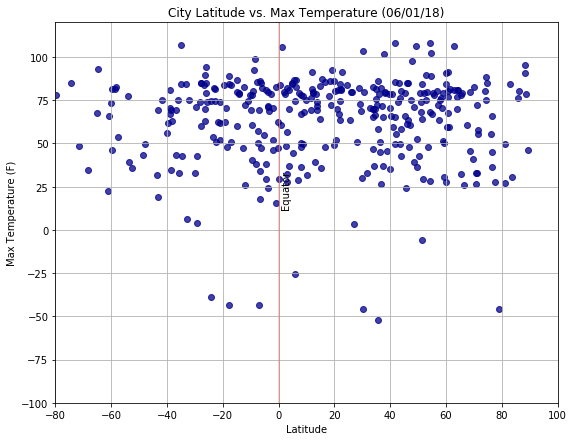

In [73]:
plt.figure(figsize=(9,7))
plt.scatter(location_data['Latitude'], pd.to_numeric(location_data['Temperature (F)']), marker='o', facecolor='darkblue',alpha = 0.75)
plt.title("City Latitude vs. Max Temperature (06/01/18)")
plt.axvline(0, color = 'red', alpha = .25, label = 'Equator')
plt.text(1,30,'Equator',rotation=90)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.xlim(-80,100)
plt.ylim(-100,120)
plt.savefig("City_Latitude-VS-Max_Temperature-06-01-18).png")
plt.show()

# Humidity (%) vs. Latitude

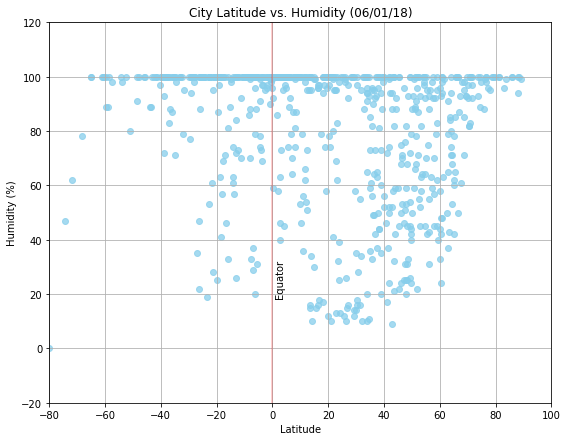

In [79]:
# Humidity (%) vs. Latitude
plt.figure(figsize=(9,7))
plt.scatter(location_data['Latitude'],location_data['Humidity'],marker='o',facecolor='skyblue', alpha = 0.75)

plt.title("City Latitude vs. Humidity (06/01/18)")
plt.axvline(0, color = 'red', alpha = .25, label = 'Equator')
plt.text(1,30,'Equator',rotation=90)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.xlim(-80,100)
plt.ylim(-20,120)
plt.savefig("Humidity.png")
plt.show()

# Cloudiness (%) vs. Latitude

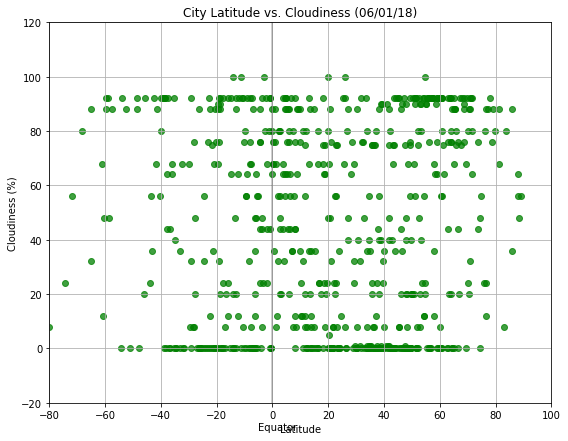

In [80]:
# Cloudiness (%) vs. Latitude
plt.figure(figsize=(9,7))
plt.scatter(location_data['Latitude'],location_data['Cloudiness'],marker='o',facecolor='green', alpha = 0.75)

plt.title("City Latitude vs. Cloudiness (06/01/18)")
plt.axvline(0, color = 'black', alpha = .25, label = 'Equator')
plt.text(-5,-30,'Equator')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.xlim(-80,100)
plt.ylim(-20,120)
plt.savefig("Cloudiness.png")
plt.show()

# Wind Speed (mph) vs. Latitude

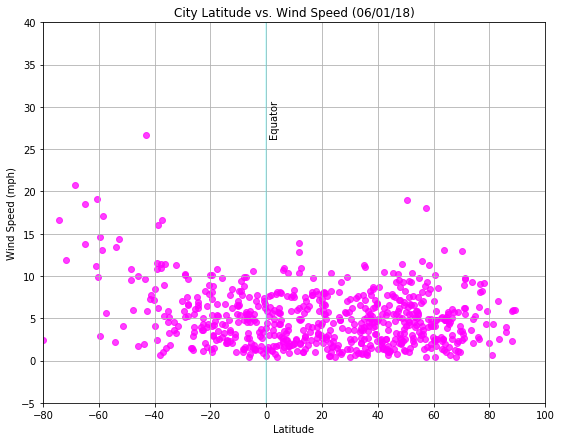

In [78]:
#  Wind Speed (mph) vs. Latitude
plt.figure(figsize=(9,7))
plt.scatter(location_data['Latitude'],location_data['Wind Speed'],marker='o',facecolor='magenta', alpha = 0.75)

plt.title("City Latitude vs. Wind Speed (06/01/18)")
plt.axvline(0, color = 'cyan', alpha = .25, label = 'Equator')
plt.text(1,30,'Equator',rotation=90)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.xlim(-80,100)
plt.ylim(-5,40)
plt.savefig("Wind_Speed.png")
plt.show()